# Introduction to PySpark
PySpark is 
- A general-purpose
- In-memory 
- Distributed processing engine

that allows you to process data efficiently in a distributed fashion. PySpark natively has machine learning and graph libraries. 

## Installation


### Run On Docker 
Pyspark Is already installed on this docker:
1. install docker
2. docker pull jupyter/all-spark-notebook
3. docker run -d --name notebook -p 10000:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Development/DockerWorkspace:/home/jovyan/work jupyter/all-spark-notebook

### Or Run on Colab
You can simply install it by `pip`.
```
$ pip install pyspark
$ pyspark
```

In [ ]:
! pip install -q pyspark

Install Open JDK for Spark and Hadoop


In [ ]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
! tar xf spark-3.2.1-bin-hadoop3.2.tgz

First We need to fix environment variables

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

Then we use `Findspark` to find spark executable


In [ ]:
! pip install -q findspark

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop3.2'

## Create Spark Session


In [ ]:
# First Method
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .getOrCreate()

sc = spark.sparkContext

In [ ]:
spark.version

'3.2.1'

In [ ]:
from pyspark import SparkContext

# run this cell only once
sc = SparkContext()
spark = SparkSession(sc)

## PySpark DataFrame
PySpark DataFrames are lazily evaluated. They are implemented on top of RDDs. When Spark transforms data, it does not immediately compute the transformation but plans how to compute later. When actions such as `collect()` are explicitly called, the computation starts. 

### What is Action?
Here is [link](https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations) for more.
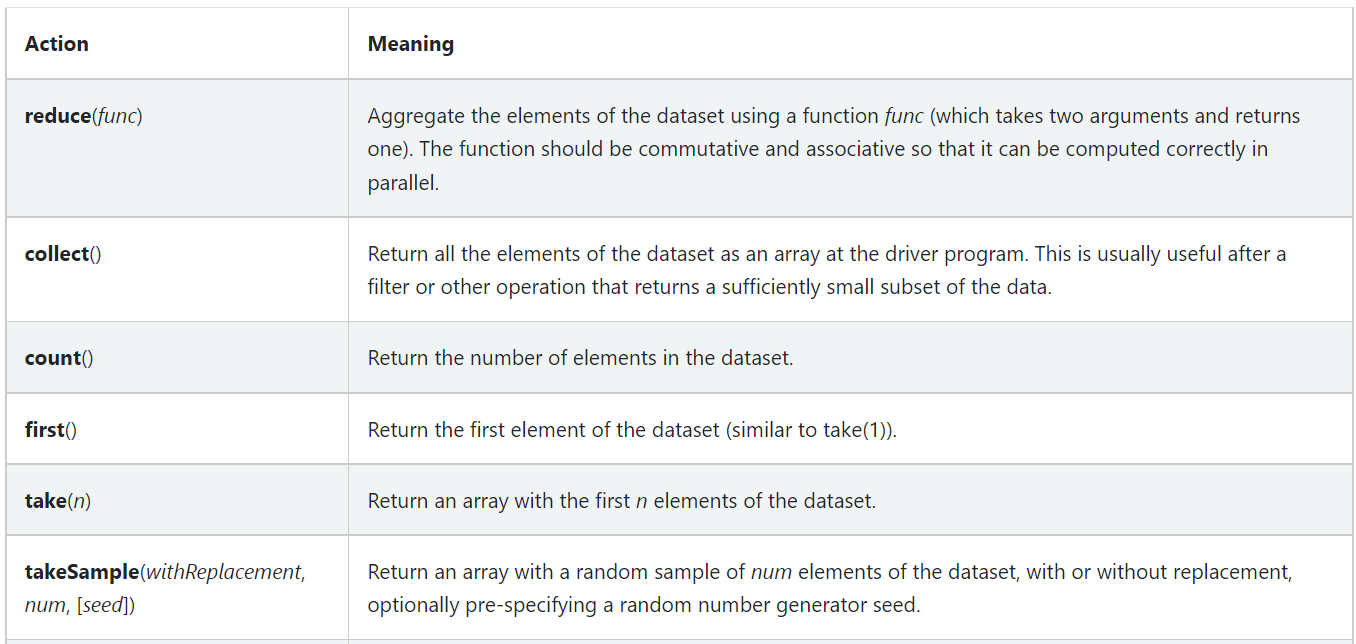

### What is Transformation?
Here is [link](https://spark.apache.org/docs/latest/rdd-programming-guide.html#actions) for more.
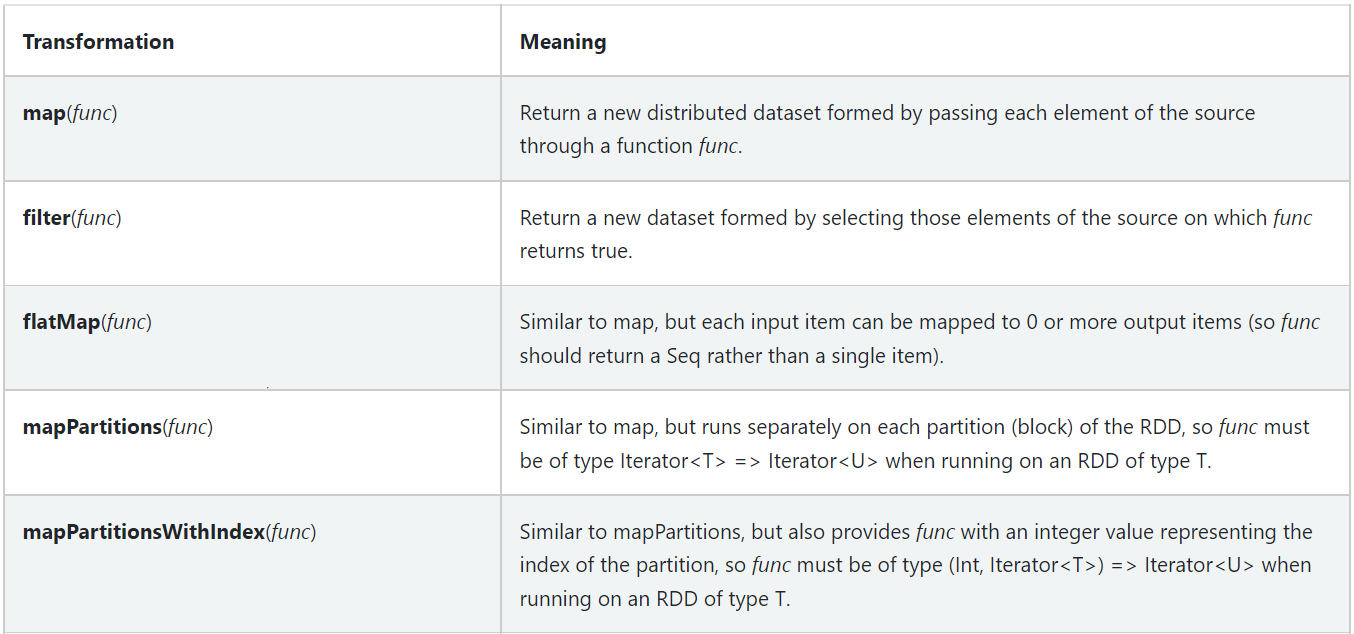

## Spark DataFrame

Import Spark Context and import other necessary utils

In [ ]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

#### Let's See the created DataFrame.

In [ ]:
df.show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  4|5.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+



In [ ]:
df.printSchema()

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



Show only first row.

In [ ]:
df.show(1)

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+
only showing top 1 row



#### Select columns

In [ ]:
df.select("a", "b", "c").show()

+---+---+-------+
|  a|  b|      c|
+---+---+-------+
|  1|2.0|string1|
|  2|3.0|string2|
|  4|5.0|string3|
+---+---+-------+



#### Descrive a Selection

In [ ]:
df.select("a", "b", "c").describe().show()

+-------+------------------+------------------+-------+
|summary|                 a|                 b|      c|
+-------+------------------+------------------+-------+
|  count|                 3|                 3|      3|
|   mean|2.3333333333333335|3.3333333333333335|   null|
| stddev|1.5275252316519465|1.5275252316519465|   null|
|    min|                 1|               2.0|string1|
|    max|                 4|               5.0|string3|
+-------+------------------+------------------+-------+



#### Collect
`DataFrame.collect()` collects the distributed data to the driver side as the local data in Python. Note that this can throw an out-of-memory error when the dataset is too large to fit in the driver side because it collects all the data from executors to the driver side.

In [ ]:
df.collect()

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),
 Row(a=4, b=5.0, c='string3', d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))]

In order to avoid throwing an out-of-memory exception, use `DataFrame.take()` or `DataFrame.tail()`

In [ ]:
df.take(2)

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0))]

You can aslo converta PySpark DataFrame to Pandas DataFrame.

In [ ]:
df.toPandas()

,a,b,c,d,e
0,1,2.0,string1,2000-01-01,2000-01-01 12:00:00
1,2,3.0,string2,2000-02-01,2000-01-02 12:00:00
2,4,5.0,string3,2000-03-01,2000-01-03 12:00:00


## Spark RDD

In [ ]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rdd1 = sc.parallelize(a)
rdd1

ParallelCollectionRDD[32] at readRDDFromFile at PythonRDD.scala:274

### RDD Primitive Operations

In [ ]:
print("First: ", rdd1.first())
print("Collect: ", rdd1.collect())
print("Count: ", rdd1.count())
print("Take: ", rdd1.take(2))
print("Max: ", rdd1.max())

First:  0
Collect:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Count:  10
Take:  [0, 1]
Max:  9


### reduce

In [ ]:
def return_latter(x1, x2):
    return x2

print(rdd1.reduce(return_latter))

9


In [ ]:
def return_sum(x1, x2):
    return x1 + x2

print(rdd1.reduce(return_sum))

45


### map

In [ ]:
rdd2 = rdd1.map(lambda x: x ** 2)
rdd2.collect()

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### filter

In [ ]:
rdd3 = rdd1.filter(lambda x: x % 2 == 0)
rdd3.collect()

[0, 2, 4, 6, 8]

### flatMap

In [ ]:
rdd1 = sc.parallelize([(1, [0, 1, 2, 3]), (4, [6, 2, 1, 4, 3, 6]), (2, [0, 3])])
rdd1 = rdd1.flatMap(lambda x: x[1][:3])
rdd1.collect()

[0, 1, 2, 6, 2, 1, 0, 3]

### Set Operations

In [ ]:
rdd1 = sc.parallelize([0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9])
rdd2 = sc.parallelize([4, 4, 5, 5, 13, 13, 14, 14])

rdd3 = rdd1.union(rdd2)
print("Union: ", rdd3.collect())

rdd4 = rdd1.intersection(rdd2)
print("Intersection: ", rdd4.collect())

print("Distinct: ", rdd2.distinct().collect())

Union:  [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 4, 4, 5, 5, 13, 13, 14, 14]
Intersection:  [4, 5]
Distinct:  [4, 5, 13, 14]


### Key Operations

In [ ]:
rdd1 = sc.parallelize([(2, "Pink Orange"), (1, "Green Apple"), (4, "Yellow Banana"), (2, "Red Orange"), (2, "Yellow Orange")])

#### Sort By Key

In [ ]:
rdd2 = rdd1.sortByKey(ascending=True)
rdd2.collect()

[(1, 'Green Apple'),
 (2, 'Pink Orange'),
 (2, 'Red Orange'),
 (2, 'Yellow Orange'),
 (4, 'Yellow Banana')]

#### Reduce by Key

In [ ]:
rdd3 = rdd1.reduceByKey(lambda v1, v2: v1 + " " + v2)
rdd3.collect()

[(2, 'Pink Orange Red Orange Yellow Orange'),
 (1, 'Green Apple'),
 (4, 'Yellow Banana')]

In [ ]:
rdd4 = rdd1.groupByKey()
print("How Group looks like: ", rdd4.collect())

How Group looks like:  [(2, <pyspark.resultiterable.ResultIterable object at 0x7fe410825310>), (1, <pyspark.resultiterable.ResultIterable object at 0x7fe4107ea2d0>), (4, <pyspark.resultiterable.ResultIterable object at 0x7fe4107f0390>)]


In [ ]:
print("Map Operation with Group: ", rdd4.map(lambda x: (x[0], list(x[1]))).collect())

Map Operation with Group:  [(2, ['Pink Orange', 'Red Orange', 'Yellow Orange']), (1, ['Green Apple']), (4, ['Yellow Banana'])]


#### Chaining Oprations
As we said before, the functions like map, filter, ... just do the planning. so we can plan with mutiple of them then call one of the actions like `collect()`

In [8]:
rdd1 = sc.parallelize(list(range(10)))

In [9]:
rdd1 = rdd1.map(lambda x: x ** 2 ).map(lambda x: x - 10 ).filter(lambda x: x % 3).distinct()
rdd1.collect()

[-10, -1, 26, 71]

## Reading with PySpark

In [10]:
! wget -q https://raw.githubusercontent.com/SajjadMb/PySpark-walkthrough/main/data/cities.csv -P ./data
! wget -q https://raw.githubusercontent.com/SajjadMb/PySpark-walkthrough/main/data/text_test.txt -P ./data

### Reading from file

In [11]:
rdd1 = sc.textFile("./data/text_test.txt")
rdd1.collect()

['hello', 'second line', 'last line', 'bye']

In [12]:
rdd1.map(lambda x: x[:2]).flatMap(lambda x: x).reduce(lambda x, y: x + '.' + y)

'h.e.s.e.l.a.b.y'

### Reading from dataframe

In [14]:
import pandas as pd

pdf = pd.read_csv("./data/cities.csv")
pdf.head()

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI


In [15]:
df = spark.createDataFrame(data=pdf)
df.show()

+----+-------+-------+-----+-------+-------+-------+-----+------------------+--------+
|LatD| "LatM"| "LatS"| "NS"| "LonD"| "LonM"| "LonS"| "EW"|            "City"| "State"|
+----+-------+-------+-----+-------+-------+-------+-----+------------------+--------+
|  41|      5|     59|  "N"|     80|     39|      0|  "W"|      "Youngstown"|      OH|
|  42|     52|     48|  "N"|     97|     23|     23|  "W"|         "Yankton"|      SD|
|  46|     35|     59|  "N"|    120|     30|     36|  "W"|          "Yakima"|      WA|
|  42|     16|     12|  "N"|     71|     48|      0|  "W"|       "Worcester"|      MA|
|  43|     37|     48|  "N"|     89|     46|     11|  "W"| "Wisconsin Dells"|      WI|
|  36|      5|     59|  "N"|     80|     15|      0|  "W"|   "Winston-Salem"|      NC|
|  49|     52|     48|  "N"|     97|      9|      0|  "W"|        "Winnipeg"|      MB|
|  39|     11|     23|  "N"|     78|      9|     36|  "W"|      "Winchester"|      VA|
|  34|     14|     24|  "N"|     77|     55

### Reading from csv

In [37]:
df = spark.read.option("header", True).csv("./data/cities.csv")
df.show()

+-----+-------+-------+-----+-------+-------+-------+-----+------------------+--------+
| LatD| "LatM"| "LatS"| "NS"| "LonD"| "LonM"| "LonS"| "EW"|            "City"| "State"|
+-----+-------+-------+-----+-------+-------+-------+-----+------------------+--------+
|   41|      5|     59|  "N"|     80|     39|      0|  "W"|      "Youngstown"|      OH|
|   42|     52|     48|  "N"|     97|     23|     23|  "W"|         "Yankton"|      SD|
|   46|     35|     59|  "N"|    120|     30|     36|  "W"|          "Yakima"|      WA|
|   42|     16|     12|  "N"|     71|     48|      0|  "W"|       "Worcester"|      MA|
|   43|     37|     48|  "N"|     89|     46|     11|  "W"| "Wisconsin Dells"|      WI|
|   36|      5|     59|  "N"|     80|     15|      0|  "W"|   "Winston-Salem"|      NC|
|   49|     52|     48|  "N"|     97|      9|      0|  "W"|        "Winnipeg"|      MB|
|   39|     11|     23|  "N"|     78|      9|     36|  "W"|      "Winchester"|      VA|
|   34|     14|     24|  "N"|   

## SQL with spark

#### Create a Temp View from dataframe

In [20]:
df.createOrReplaceTempView("CITY_DATA")

#### Select 

In [21]:
df2 = spark.sql('SELECT * from CITY_DATA')
df2.show()

+-----+-------+-------+-----+-------+-------+-------+-----+------------------+--------+
| LatD| "LatM"| "LatS"| "NS"| "LonD"| "LonM"| "LonS"| "EW"|            "City"| "State"|
+-----+-------+-------+-----+-------+-------+-------+-----+------------------+--------+
|   41|      5|     59|  "N"|     80|     39|      0|  "W"|      "Youngstown"|      OH|
|   42|     52|     48|  "N"|     97|     23|     23|  "W"|         "Yankton"|      SD|
|   46|     35|     59|  "N"|    120|     30|     36|  "W"|          "Yakima"|      WA|
|   42|     16|     12|  "N"|     71|     48|      0|  "W"|       "Worcester"|      MA|
|   43|     37|     48|  "N"|     89|     46|     11|  "W"| "Wisconsin Dells"|      WI|
|   36|      5|     59|  "N"|     80|     15|      0|  "W"|   "Winston-Salem"|      NC|
|   49|     52|     48|  "N"|     97|      9|      0|  "W"|        "Winnipeg"|      MB|
|   39|     11|     23|  "N"|     78|      9|     36|  "W"|      "Winchester"|      VA|
|   34|     14|     24|  "N"|   

In [46]:
df2 = spark.sql('SELECT * from CITY_DATA')
df2.show()

+-----+-------+-------+-----+-------+-------+-------+-----+------------------+--------+
| LatD| "LatM"| "LatS"| "NS"| "LonD"| "LonM"| "LonS"| "EW"|            "City"| "State"|
+-----+-------+-------+-----+-------+-------+-------+-----+------------------+--------+
|   41|      5|     59|  "N"|     80|     39|      0|  "W"|      "Youngstown"|      OH|
|   42|     52|     48|  "N"|     97|     23|     23|  "W"|         "Yankton"|      SD|
|   46|     35|     59|  "N"|    120|     30|     36|  "W"|          "Yakima"|      WA|
|   42|     16|     12|  "N"|     71|     48|      0|  "W"|       "Worcester"|      MA|
|   43|     37|     48|  "N"|     89|     46|     11|  "W"| "Wisconsin Dells"|      WI|
|   36|      5|     59|  "N"|     80|     15|      0|  "W"|   "Winston-Salem"|      NC|
|   49|     52|     48|  "N"|     97|      9|      0|  "W"|        "Winnipeg"|      MB|
|   39|     11|     23|  "N"|     78|      9|     36|  "W"|      "Winchester"|      VA|
|   34|     14|     24|  "N"|   

## User Defiend Fucntion (UDF)

In [ ]:
# Clean